In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("crx.data",header=None)

In [3]:
x=data.loc[:,0:data.shape[1]-2]
y=data[data.shape[1]-1]
x=x.replace('?',np.nan)

In [4]:
x[1]=x[1].astype(float)

In [5]:
n,p=x.shape
c=len(np.unique(y))

In [6]:
x.describe()

,1,2,7,10,14
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [7]:
idxCat=[0,3,4,5,6,8,9,11,12,13]
x[idxCat].mode()

,0,3,4,5,6,8,9,11,12,13
0,b,u,g,c,v,t,f,f,g,00000


In [8]:
for i,idxi in enumerate(idxCat):
    print(x[idxi].unique())


['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' nan '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040'
 '00181' '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029'
 '00102' '00431' '00370' '00024' '00020' '00129' '00510' '00195' '00144'
 '00380' '00049' '00050' '00381' '00150' '00117' '00056' '00211' '00230'
 '00156' '00022' '00228' '00519' '00253' '00487' '00220' '00088' '000

In [9]:
x.isnull().sum()*100/n

0     1.739130
1     1.739130
2     0.000000
3     0.869565
4     0.869565
5     1.304348
6     1.304348
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    1.884058
14    0.000000
dtype: float64

In [10]:
x.columns=['Gender','Age','Debt','Married','bankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen','ZipCode','Income']
#x.info()
x=x.replace('t',1)
x=x.replace('f',0)

x['Gender']=x['Gender'].replace('a','m')
x['Gender']=x['Gender'].replace('b','f')

x['ZipCode']=x['ZipCode'].replace('00000',np.nan)

In [11]:
x[['PriorDefault','Employed','DriversLicense']]=x[['PriorDefault','Employed','DriversLicense']].astype(bool)

In [12]:
x.isnull().sum()*100/n

Gender             1.739130
Age                1.739130
Debt               0.000000
Married            0.869565
bankCustomer       0.869565
EducationLevel     1.304348
Ethnicity          1.304348
YearsEmployed      0.000000
PriorDefault       0.000000
Employed           0.000000
CreditScore        0.000000
DriversLicense     0.000000
Citizen            0.000000
ZipCode           21.014493
Income             0.000000
dtype: float64

In [13]:
x=x.drop(['ZipCode'],axis=1)

In [14]:
modeValues=x.mode()      # dataframe
medianValues=x.median() # series

# categorical data 
x['Gender'].fillna(value=modeValues['Gender'][0],inplace=True)
x['Married'].fillna(value=modeValues['Married'][0],inplace=True)
x['bankCustomer'].fillna(value=modeValues['bankCustomer'][0],inplace=True)
x['EducationLevel'].fillna(value=modeValues['EducationLevel'][0],inplace=True)
x['Ethnicity'].fillna(value=modeValues['Ethnicity'][0],inplace=True)

# numerical data
x['Age'].fillna(value=medianValues['Age'],inplace=True)

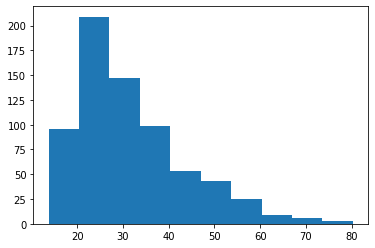

In [15]:
plt.hist(x['Age'],bins=10);

In [16]:
x.head()

,Gender,Age,Debt,Married,bankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income
0,f,30.83,0.000,u,g,w,v,1.25,True,True,1,False,g,0
1,m,58.67,4.460,u,g,q,h,3.04,True,True,6,False,g,560
2,m,24.50,0.500,u,g,q,h,1.50,True,False,0,False,g,824
3,f,27.83,1.540,u,g,w,v,3.75,True,True,5,True,g,3
4,f,20.17,5.625,u,g,w,v,1.71,True,False,0,False,s,0


In [19]:
xsel=pd.concat([x['Employed'],y], axis=1)
xsel.columns=['Employed','Class']

xsel.groupby(['Employed','Class'])['Employed'].count()

Employed  Class
False     +         98
          -        297
True      +        209
          -         86
Name: Employed, dtype: int64

In [21]:
dftemp=xsel.groupby(['Employed','Class'])['Employed'].count().unstack()
dftemp

Class,+,-
Employed,,
False,98,297
True,209,86


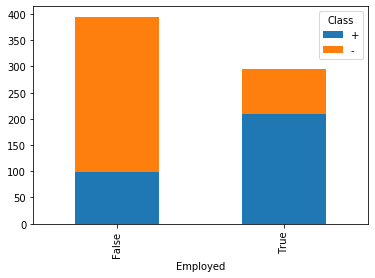

In [22]:
dftemp.plot(kind='bar',stacked=True, label='Employed')

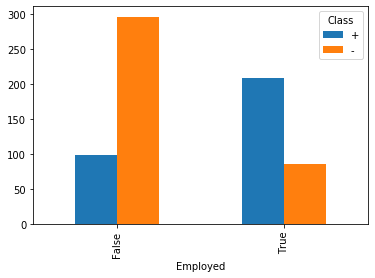

In [24]:
dftemp.plot(kind='bar',stacked=False, label='Employed')

In [25]:
from statsmodels.graphics.mosaicplot import mosaic

Text(0, 0.5, 'Employed')

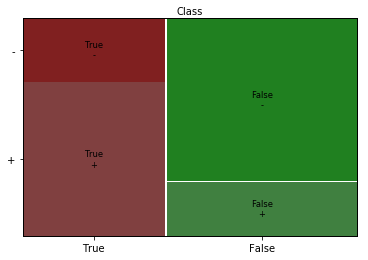

In [30]:
mosaic(xsel,['Employed','Class'])
plt.xlabel('Class')
plt.ylabel('Employed')

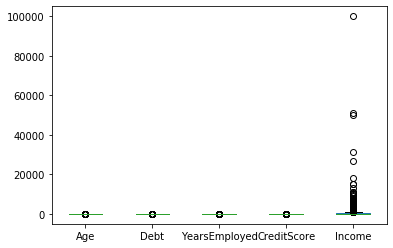

In [53]:
x.plot.box();

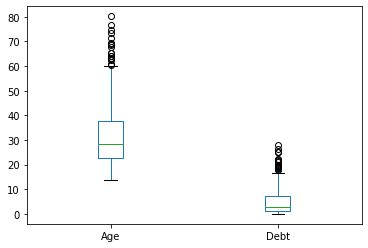

In [52]:
x[['Age', 'Debt']].plot.box();

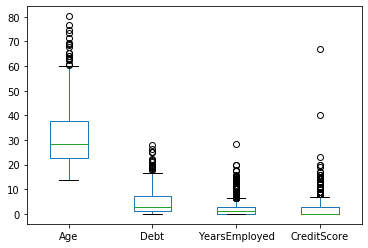

In [51]:
x[['Age', 'Debt','YearsEmployed','CreditScore']].plot.box();

<Figure size 1080x1080 with 0 Axes>

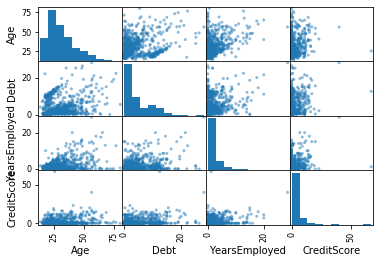

<Figure size 1080x1080 with 0 Axes>

In [55]:
pd.plotting.scatter_matrix(x[['Age','Debt','YearsEmployed','CreditScore']]);
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(1,15))

In [41]:
x['CreditScore'].idxmax()

121

In [49]:
#La valeur Max du CreditScore est de 67 et elle se trouve sur la ligne 121
x.loc[x['CreditScore'].idxmax(),:]

Gender                f
Age               25.67
Debt               12.5
Married               u
bankCustomer          g
EducationLevel       cc
Ethnicity             v
YearsEmployed      1.21
PriorDefault       True
Employed           True
CreditScore          67
DriversLicense     True
Citizen               g
Income              258
Name: 121, dtype: object